# Méthodes Itératives de base

Ici pour la résolution du système linéaire $Ax=b$, où $A$ est une matrice $nxn$, $b$ un vecteur de $n$ scalaires et $x$ un vecteur de $R^n$, on décompose $A$ comme suit: $A=D-L-U$ où $D$ est la partie diagonale,$L$ la partie strictement inf-triangulaire et $U$ la partie strictement sup-triangulaire.  
Le but de ces méthodes est de résoudre ce système avec $O(N.n^2)$ opérations arithmétiques élémentaires, avec $N<<n$ qui est égal à $O(n^2)$ meilleur que les méthodes directes qui se résolvent avec un cout de $O(n^3)$.

## Jacobi's method

Cette méthode est utilisée lorsque la matrice de la méthode $B_{J}=D^{-1}(L+U)$ a un rayon spectrale strictement inférieur à 1.

In [1]:
import numpy as np

In [2]:
def Jacobi(A, b, xo):
    
    L = -1*np.tril(A, -1)
    D = np.diag(np.diag(A))
    U = -1*np.triu(A, +1)
    eps = 10**-6
    xk = xo
    
    while (np.linalg.norm(np.dot(A,xk)-b)/np.linalg.norm(b))>=eps:
        xk = np.dot(np.linalg.inv(D).dot(L+U), xk) + np.dot(np.linalg.inv(D), b)
    x = xk
    return x

### Test de l'algorithme

In [3]:
A = np.array([[8,4,4], [4,8,0], [4,0,8]])
b = np.array([1,1,1]).reshape(3,1)
xo = np.zeros((3,1))
# La solution est le vecteur suivant :
Jacobi(A, b, xo)

array([[0.        ],
       [0.12499988],
       [0.12499988]])

### Vérification avec la méthode prédéfinie par python

In [4]:
np.linalg.solve(A,b)

array([[0.   ],
       [0.125],
       [0.125]])

## Gauss-Seidel's method

Elle est utilisée pour les matrices $Symétriques$ $Définies$ $Positives$

In [5]:
def Gauss_Seidel(A, b, xo):
    
    L = -1*np.tril(A, -1)
    D = np.diag(np.diag(A))
    U = -1*np.triu(A, +1)
    eps = 10**-6
    xk = xo
    
    while (np.linalg.norm(np.dot(A,xk)-b)/np.linalg.norm(b))>=eps:
            xk = np.dot(np.linalg.inv(D-L).dot(U), xk) + np.dot(np.linalg.inv(D-L), b)
    x = xk
    return x

### Test avec la matrice de differences finis

In [6]:
# La solution est le vecteur suivant :
Gauss_Seidel(np.array([[2,1,0],[-1,2,1],[0,-1,2]]), np.ones((3,1)), np.zeros((3,1)))

array([[0.33333373],
       [0.33333373],
       [0.66666687]])

### Verification avec la methode predefinie par Python

In [7]:
np.linalg.solve(np.array([[2,1,0],[-1,2,1],[0,-1,2]]),  np.ones((3,1)))

array([[0.33333333],
       [0.33333333],
       [0.66666667]])

## SOR methods

Elle converge pour les matrices $Symétriques$ $Définies$ $Positives$ lorsque le paramètre de relaxation $w$ est tel que $0<w<2$ et le rayon spectrale de la méthode est strictement inférieure à 1.  
La valeure optimale du paramètre de relaxation est $w_{opt}=\frac{2}{1+\sqrt {1 - \rho(B_{J})^2}}$ où $\theta$ est le rayon de convergence de $B_{J}$.

In [8]:
def SOR(A, b,xo):
    
    D = np.diag(np.diag(A))
    U = -1*np.triu(A, +1)
    L = -1*np.tril(A, -1)
    #w pris de facon aleatoire dans [0,1)
    np.random.seed(1)
    w = 2*np.random.random()
    
    # Matrice de la méthode B
    B = np.linalg.inv(((1.0/w)*D-L)).dot(((1-w)/w)*D + U)
    c = np.dot(np.linalg.inv((1.0/w)*D - L), b)
    
    eps = 10**-12
    xk = xo 
    
    while (np.linalg.norm(b-1*np.dot(A,xk))/np.linalg.norm(b-1*np.dot(A,xo)))>=eps:
        xk = np.dot(B,xk) + c
    x = xk
    return x


### Test avec la matrice de differences finis qui est SDP

In [9]:
A = np.array([[26,0,25],[0,4,0],[25,0,26]])
b = np.array([1,1,1]).reshape(3,1)
xo = np.zeros((3,1))

In [10]:
# La solution est le vecteur suivant :
SOR(A, b,xo)

array([[0.01960784],
       [0.25      ],
       [0.01960784]])

### Vérification avec la méthode prédéfinie par python

In [11]:
np.linalg.solve(A,  b)

array([[0.01960784],
       [0.25      ],
       [0.01960784]])

# Méthodes des sous espaces de Krylov

## Arnoldi's method

$Aims :$ Compute an Orthonormal basis of Krylov space $K_{m}(A,r_{o})$

In [12]:
def Arnoldi(A,b,n):
    
    m = A.shape[0]
    h = np.zeros((n+1,n))
    Q = np.zeros((m,n+1))
    q = b/np.linalg.norm(b)
    Q[:,0] = q
    
    for k in range(n):
        v = A.dot(q)
        for j in range(k+1):
            h[j,k] = np.dot(Q[:,j].conj(),v)
            v = v - h[j,k]*Q[:,j]
        
        h[k+1,k] = np.linalg.norm(v)
        eps = 1e-12
        if h[k+1,k]>eps:
            q = v/h[k+1,k]
            Q[:,k+1] = q
        else:
            return Q,h
    return Q,h

### Test de la méthode 

Test avec la matrice \begin{equation*}
A = 
\begin{pmatrix}
2 & 1 & 0 \\
-1 & 2 & 1\\
0 & -1 & 2
\end{pmatrix}
\end{equation*} , et le vecteur \begin{equation*}
b = 
\begin{pmatrix}
2 & 0 & 1
\end{pmatrix}
\end{equation*} avec $n=3$

### Test de l'algorithme

In [13]:
A = np.array([[2,1,0],[-1, 2,1],[0,-1,2]])
Q, h = Arnoldi(A,b=np.array([2,0,1]),n=3)

In [14]:
h

array([[ 2.00000000e+00, -4.47213595e-01, -1.77635684e-15],
       [ 4.47213595e-01,  2.00000000e+00, -1.34164079e+00],
       [ 0.00000000e+00,  1.34164079e+00,  2.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.59896547e-15]])

In [15]:
Q

array([[ 8.94427191e-01,  4.96506831e-16, -4.47213595e-01,
         0.00000000e+00],
       [ 0.00000000e+00, -1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 4.47213595e-01,  2.48253415e-16,  8.94427191e-01,
         0.00000000e+00]])

### Vérification

La matrice $R$ suivante est formé des produits scalaires des vecteurs colones de $A$; donc si l'algorithme est bon ce qu'il s'agit de la matrice indentité de la base canonique de $R^n$.

In [16]:
R = np.zeros(A.shape)
for i in range(A.shape[1]):
    for j in range(A.shape[1]):
        R[i,j] = np.vdot(Q[:,i],Q[:,j])
R 

array([[ 1.00000000e+00,  5.55111512e-16, -8.88178420e-16],
       [ 5.55111512e-16,  1.00000000e+00, -4.68386162e-31],
       [-8.88178420e-16, -4.68386162e-31,  1.00000000e+00]])

In [17]:
eps = 1e-12
#Les éléments non nuls de la matrice R sont :
R[R>eps]

array([1., 1., 1.])

In [18]:
# Les éléments diagonaux de R sont
np.diag(R)

array([1., 1., 1.])

Donc $R$ est la matrice identité de $R^3$ par conséquent l'ago est bien implémentée.

## Classical Gram-Schmidt

$Aims :$ Find Orthogonal base $Q=(q_{1},...,q_{m})$ of given base $X=(x_{1},...,x_{m})$ of $R^m$

In [19]:
def Classical_GS(X):

    n, m = X.shape[0], X.shape[1]
    Q = np.zeros((n,m))
    Q1 = np.zeros((n,m))
    R = np.zeros((m,m))
    Q[:,0] = X[:,0]/np.linalg.norm(X[:,0])
    
    for j in range(1,m):
        for i in range(j-1):
            R[i,j] = np.dot(X[:,j].T,Q[:,i])
        Q1[:,j] = X[:,j] - np.asarray(sum([R[i,j]*Q[:,i] for i in range(1,j)]))
        R[j,j] = np.linalg.norm(Q1[:,j])
        if R[j,j] == 0:
            break
        Q[:,j] = Q1[:,j]/R[j,j]
    return Q

### Test avec une base de $R^n$ donnée

In [20]:
X = np.array([[9,2,3],[1,4,5],[3,2,1]])
Q = Classical_GS(X)
Q

array([[0.94345635, 0.40824829, 0.50709255],
       [0.10482848, 0.81649658, 0.84515425],
       [0.31448545, 0.40824829, 0.16903085]])

## Modified Gram-Schmidt

$Aims :$ Find Orthogonal base $Q=(q_{1},...,q_{m})$ of given base $X=(x_{1},...,x_{m})$ of $R^m$

In [21]:
def modifiedGS(A):
    
    n = A.shape[0]
    Q = np.zeros(A.shape, dtype=A.dtype)
    
    for j in range(0,n):
        q = A[:,j]
        for i in range(0,j):
            rij = np.vdot(q,Q[:,i])
            q = q - rij*Q[:,i]
        rjj = np.linalg.norm(q, ord=2)
        if np.isclose(rjj,0.0):
            raise ValueError("invalid imput matrix")
        else:
            Q[:,j] = q/rjj
    return Q
                

### Test de la méthode

In [22]:
A = np.array([[1,2,3.0,7],[4.0,5,6.0,4],[7,8,9,5.0],[1,9,8,5.0]])
Q = modifiedGS(A)
Q

array([[ 1.22169444e-01,  8.97949476e-02,  9.00191550e-01,
         4.08248290e-01],
       [ 4.88677777e-01, -2.48369004e-02,  3.06448187e-01,
        -8.16496581e-01],
       [ 8.55186110e-01, -1.39468748e-01, -2.87295176e-01,
         4.08248290e-01],
       [ 1.22169444e-01,  9.85833893e-01, -1.14918070e-01,
         4.41915486e-15]])

### Vérification

In [23]:
R = np.zeros(A.shape)
for i in range(A.shape[1]):
    for j in range(A.shape[1]):
        R[i,j] = np.vdot(Q[:,i],Q[:,j])
R 

array([[ 1.00000000e+00,  3.46944695e-17,  7.21644966e-16,
        -1.55431223e-15],
       [ 3.46944695e-17,  1.00000000e+00, -1.42941214e-15,
         4.73232564e-15],
       [ 7.21644966e-16, -1.42941214e-15,  1.00000000e+00,
         8.60422844e-16],
       [-1.55431223e-15,  4.73232564e-15,  8.60422844e-16,
         1.00000000e+00]])

In [24]:
eps = 10**-8 # Epsilon machine
# On détermine les éléments supérieurs à eps, ce qui correspond à la diagonale de R
R[R>eps]

array([1., 1., 1., 1.])

In [25]:
#Diagonale de R
np.diag(R)

array([1., 1., 1., 1.])

R est la matrice identité d'ordre 4; donc le code resoud le problème

# Méthodes de projection

## Steepest Descent Algorithm

La méthode du Gradient de plus forte pente est définit dans le cas où la matrice $A$ est Symétrique Définie Positive.  
La projection sur une dimension est définie dans le cas où  $K=vect(v)$ et  $L=vect(w)$.  
Elle consiste à prendre à chaque étape $v=r$ et $w=r$ ou r est le résidu à l'étape k.

In [26]:
def Steepest_Descent(A,b,xo):
    
    eps = 10**-15
    x = xo
    r = b - np.dot(A,x)
    p = np.dot(A,r)
    
    while np.linalg.norm(r)>eps:
        a = np.dot(r.T,r)/np.dot(p.T,r)
        x = x + a*r
        r = r - a*p
        p = np.dot(A,r)
    return x

### Test avec la matrice de differences finis d'ordre $n = 10$

In [27]:
n = 10
A = np.diag(np.array(
    [2 for i in range(n)]), k=0) + np.diag(np.array([-1 for i in range(n-1)
]), k=1) + np.diag(np.array([-1 for i in range(n-1)]),k=-1)
A

array([[ 2, -1,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1,  2, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  2, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  2, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  2, -1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  2, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  2, -1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  2, -1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  2, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1,  2]])

In [28]:
#La solution est le vecteur suivant :
Steepest_Descent(A,np.ones((n,1)),np.zeros((n,1)))

array([[ 5.],
       [ 9.],
       [12.],
       [14.],
       [15.],
       [15.],
       [14.],
       [12.],
       [ 9.],
       [ 5.]])

### Vérification avec la méthode prédéfinie par python

In [29]:
np.linalg.solve(A,np.ones((n,1)))

array([[ 5.],
       [ 9.],
       [12.],
       [14.],
       [15.],
       [15.],
       [14.],
       [12.],
       [ 9.],
       [ 5.]])

## Minimal Residual Iteration

Dans cette méthode, $A$ n'est pas nécéssairement symétrique néanmoins est $définie$ $positive$.  
$K=vect(v)$, $L=vect(w)$ où $v=r$ et $w=r$

In [30]:
def MinRes(A,b,xo):
    
    eps = 10**-15
    x = xo
    r = b - np.dot(A,x)
    p = np.dot(A,r)
    
    while np.linalg.norm(r)>eps:
        a = np.dot(p.T,r)/np.dot(p.T,p)
        x = x + a*r
        r = r - a*p
        p = np.dot(A,r)
    return x

### Test avec la matrice de differences finis d'ordre $n=10$

In [31]:
# La solution est le vecteur suivant :
MinRes( A,np.ones((n,1)),np.zeros((n,1))).T

array([[ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.]])

### Vérification avec la méthode prédéfinie par python

In [32]:

np.linalg.solve(A,np.ones((n,1))).T

array([[ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.]])

## Residual Norm Steepest Descent

Ici $A$ est une matrice inversible, $L=Vect(A{}^tAr)$ et $K=Vect({}^tAr)$

In [33]:
def RNSD(A,b,xo):
    
    eps = 10**-15
    x = xo
    r = b - np.dot(A,x)
    
    while np.linalg.norm(r)>eps:
        v = np.dot(A.T,r)
        p = np.dot(A,v)
        alpha = np.dot(v.T,v)/np.dot(p.T,p)
        x = x + alpha*v
        r = r - alpha*p
    return x

### Test avec une matrice inversible 

In [34]:
# La solution est le vecteur suivant : 
RNSD(np.array([[1,2,3],[2,0,2],[8,9,4]]),np.ones((3,1)),np.ones((3,1)))

array([[ 0.09615385],
       [-0.15384615],
       [ 0.40384615]])

### Vérification avec la méthode prédéfinie par python

In [35]:
np.linalg.solve(np.array([[1,2,3],[2,0,2],[8,9,4]]),np.ones((3,1)))

array([[ 0.09615385],
       [-0.15384615],
       [ 0.40384615]])

## Méthode GMRES

In [36]:
def GMRes(A, b, xo, e, nmax_iter, restart=None):
    r = b-np.asarray(np.dot(A,xo)).reshape(-1)
    
    x = []
    q = [0]*(nmax_iter)
    
    x.append(r)
    
    q[0] = r/np.linalg.norm(r)
    h = np.zeros((nmax_iter+1, nmax_iter))
    
    for k in range(nmax_iter):
        y = np.asarray(np.dot(A,q[k])).reshape(-1)
        
        for j in range(k):
            h[j,k] = np.dot(q[j],y)
            y = y-h[j,k]*q[j]
        h[k+1,k] = np.linalg.norm(y)
        if (h[k+1,k] != 0 and k != nmax_iter-1):
            q[k+1] = y/h[k+1,k]
            
        b = np.zeros(nmax_iter+1)
        b[0] = np.linalg.norm(r)
        
        result = np.linalg.lstsq(h,b)[0]
        x.append(np.dot(np.asarray(q).transpose(), result)+xo)
    return x

### Test de la méthode

In [37]:
A = np.matrix('1 1; 3 -4')
b = np.array([3, 2])
xo = np.array([1, 2])
e = 0
nmax_iter = 5
x = GMRes(A, b, xo, e, nmax_iter, restart=None)
x

C:\Users\Hermann Sockeng\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


[array([0, 7]),
 array([1., 2.]),
 array([1.35945946, 0.56216216]),
 array([1.73194463, 0.80759216]),
 array([2.01712479, 0.96133459]),
 array([2.01621042, 0.95180204])]

### Vérification avec une méthode prédéfinie par python

# Stockage des matrices creuses en mémoire

Une matrice creuse est une matrice contenant beaucoup de zéros.  
Des matrices creuses de tailles importante apparaissent souvent en sciences et en ingénieurie pour la résolution des équations aux dérivées partielles.  
Quand on veut manipuler ou stocker des matrices creuses à l'aide de l'outil informatique, il est avantagieux voire souvent nécessaire d'utiliser des algorithmes de structures de données qui prenent en compte la structure peu dense de la matrice.  
Les opérations utilisant les structures et les algorithmes de base sur les matrices sont lents et utilisent une grande quantité de mémoires quand ils sont utilisés sur des grandes matrices creuses. Ces données sont facilement compréssibles, et cette compréssion amène presque chaque fois une baisse significative de la consommation mémoire. Deplus,  certaines matrices creuses de très grandes taille ne sont pas manipulables par des algorithmes classiques.

Le stockage des matrices creuses peut etre effectué aux format suivants :
* csc_matrix : Compressed Sparse Column format
* csr_matrix : Compressed Sparse Row format
* bsr_matrix : Block Sparse Row format
* lil_matrix : List of Lists format
* dok_matrix : Dictionary of Keys format
* coo_matrix : COOrdinate format
* dia_matrix : DIAgonal format

On se propose par exemple de stocker la matrice : \begin{equation*}
M = 
 \begin{pmatrix}
a & 0 & 0 & 0 & 0 \\
0 & 0 & b & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & c \\
0 & 0 & 0 & 0 & 0 
 \end{pmatrix}
\end{equation*} 

On stocke juste le vecteur des valeurs non nulles de la matrice $values=[a, b, c]$ et leurs positions : le vecteur ligne $rows=[0, 1, 3]$ et le vecteur colone $cols=[0, 2, 4]$ de ces valeurs; ce qui est équivalent à une matrice $3\times 3$.
On aura donc juste à stocker une matrice $3\times 3$ en lieu et place d'une matrice $5\times 5$.

## Stockage CSC des matrices creuses  
### Compresssed Sparse Column format  
Ici les opérations matricielles sont optimisées, le "slicing" suivant les colones est efficace tout comme le produit matricielle vecteur. Toutefois, la conversion dans d'autres formats peut etre couteuse.
#### Exemple :
On se propose de stocker la matrice $M$ ci-dessus pour a=1, b=2 et c=3 avec la méthode CSC

In [38]:
import scipy as sp
import scipy.sparse as spsp

In [39]:
a,b,c = 1,2,3
# Vecteurs de valeurs et des positions des valeurs nons nulles de M
values = sp.array([a,b,c])
rows = sp.array([0,1,3])
cols = sp.array([0,2,4])
#Matrice compréssée au format CSC
Mcsc = spsp.csc_matrix((values,(rows,cols)),shape=(5,5))
print(Mcsc.todense())

[[1 0 0 0 0]
 [0 0 2 0 0]
 [0 0 0 0 0]
 [0 0 0 0 3]
 [0 0 0 0 0]]


## Stockage CSR des matrices creuses  
### Compresssed Sparse Row format 
Ici les opérations matricielles sont optimisées, le "slicing" suivant les lignes est efficace tout comme le produit matricielle vecteur. Toutefois, la conversion dans d'autres formats peut \^etre co\^uteuse.

In [40]:
# Vecteurs de valeurs et des positions des valeurs nons nulles de M
values = sp.array([a,b,c])
rows = sp.array([0,1,3])
cols = sp.array([0,2,4])
#Matrice compréssée au format CSR
Mcsr = spsp.csr_matrix((values,(rows,cols)),shape=(5,5))
print(Mcsr.todense())

[[1 0 0 0 0]
 [0 0 2 0 0]
 [0 0 0 0 0]
 [0 0 0 0 3]
 [0 0 0 0 0]]


## Stockage BSR des matrices creuses  
### Compresssed Sparse Row format 
Ce format est approprié pour des matrices creuses à blocs denses. Cette méthode est très proche du format csr et peut permettre une accélération des opérations arithmétiques et des produits matrices vecteurs.  
Stockage de la matrice suivante au format BSR : \begin{equation*}
 N=
    \begin{pmatrix} 
1 & 1 & 0 & 0 & 2 & 2 \\
1 & 1 & 0 & 0 & 2 & 2 \\
0 & 0 & 0 & 0 & 3 & 3 \\
0 & 0 & 0 & 0 & 3 & 3 \\
4 & 4 & 5 & 5 & 6 & 6 \\
4 & 4 & 5 & 5 & 6 & 6
    \end{pmatrix}
\end{equation*}

In [41]:
# Exemple au format BSR
# Vecteurs de valeurs et des positions des valeurs nons nulles de M
values = sp.array([1,2,3,4,5,6]).repeat(4)
rows = sp.array([0,2,2,0,1,2])
cols = sp.array([0,2,3,6])
values = values.reshape(6,2,2) # 6 blocs de taille 2x2
# Matrice compréssée au format BSR
Mbsr = spsp.bsr_matrix((values,rows,cols),shape=(6,6))
print(Mbsr.todense())

[[1 1 0 0 2 2]
 [1 1 0 0 2 2]
 [0 0 0 0 3 3]
 [0 0 0 0 3 3]
 [4 4 5 5 6 6]
 [4 4 5 5 6 6]]


Lorsque la matrice est très grande taille comme c'est souvent le cas, on peut visualiser les creux sous forme d'images à l'instar de $N$ comme suit :

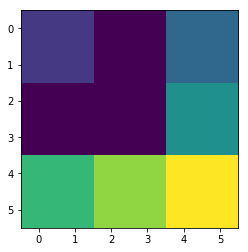

In [51]:
import matplotlib.pyplot as plt
plt.imshow(Mbsr.todense())
plt.savefig('matrice')

La bande maron représente l'ensemble des creux de la matrice $N$

## Stockage LIL des matrices creuses  
 

* Avantages :  
Flexibilité sur le "Slicing", changement de structure permis.  
Conversion en d'autres formats de matrices creuses performante.
* Inconvénients :  
lil + lil est lent  
Produit matrice vecteur lent  
"Slicing" suivant les colones lent  
C'est un format agréable pour construire les matrices creuses mais pas pour calculer ensuite.

In [ ]:
A = spsp.lil_matrix((3,3))
A[2,0], A[1,2], A[1,1]  = -10,  10, 1
# affichage de la matrice : valeurs non nulles et position au format LIL 
print(A)

In [44]:
# Affichage des positions
print(A.rows)

[list([]) list([1, 2]) list([0])]


In [45]:
# Valeurs non nulles
print(A.data)
A

[list([]) list([1.0, 10.0]) list([-10.0])]


<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in LInked List format>

##  Dictionary of Keys format

C'est un autre format permettant de créer une matrice creuse de façon incrémentale :

In [46]:
Mdok = spsp.dok_matrix((3,3), dtype=float)
for i in range(3):
    for j in range(3):
        Mdok[i,j] = i+j
print(Mdok)

  (0, 1)	1.0
  (0, 2)	2.0
  (1, 0)	1.0
  (1, 1)	2.0
  (1, 2)	3.0
  (2, 0)	2.0
  (2, 1)	3.0
  (2, 2)	4.0


L'accès en $O(1)$ à un élément. Conversion efficace en d'autres format.

## coo_matrix : COOrdinate format


In [47]:
# Exemple de stockage
rows = sp.array([0,0,1,3,1,0,0])
cols = sp.array([0,2,1,3,1,0,0])
data = sp.array([1,1,1,1,1,1,1])
Mcoo = spsp.coo_matrix((data,(rows,cols)),shape=(4,4))
print(Mcoo)

  (0, 0)	1
  (0, 2)	1
  (1, 1)	1
  (3, 3)	1
  (1, 1)	1
  (0, 0)	1
  (0, 0)	1


In [48]:
# Matrice stockée
print(Mcoo.todense())

[[3 0 1 0]
 [0 2 0 0]
 [0 0 0 0]
 [0 0 0 1]]


* Avantages :  
Conversion à d'autres formats de matrices creuses performante (très rapide vers les formats csc/csr)  
Permet la duplication des entrées (automatiquement sommées lors d'une conversion vers un autre format).
* Inconvéniants :  
Les opérations arithmétiques du type de coo + coo sous-entendent une conversion vers un autre format:

In [49]:
Mcoo

<4x4 sparse matrix of type '<class 'numpy.int32'>'
	with 7 stored elements in COOrdinate format>

In [50]:
Mcoo + Mcoo

<4x4 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

Inpossible de renvoyer la valeur d'un élément sans conversion préliminaire.

## dia_matrix : DIAgonal format


Pour la pluspart des temps, cette matrice est diagonale et peut alors etre représenté comme suit :

In [51]:
values = sp.array([[1,2,3,4]])
values = values.repeat(3, axis=0)
offsets = sp.array([0,-1,2])
Mdia = spsp.dia_matrix((values, offsets), shape=(4,4))
Mdia.todense()

matrix([[1, 0, 3, 0],
        [1, 2, 0, 4],
        [0, 2, 3, 0],
        [0, 0, 3, 4]])

In [52]:
Mdia

<4x4 sparse matrix of type '<class 'numpy.int32'>'
	with 9 stored elements (3 diagonals) in DIAgonal format>